# Real Estate Analysis

## Overview

This project is an analysis of real estate within California. The goal of the project is to be able to predict sale price based on the features of the house. 

## Business Problem

The business problem for this project is to accurately price houses for sale according to the features of the house. 

## Data Understanding

The California Real Estate dataset from Kaggle has around 35,000 records of houses within the state. There are a total of 38 columns and include data such as location, size, and amenities. 

In [64]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [65]:
df = pd.read_csv('data/RealEstate_California.csv', index_col=0) #loading the data
df.head() #Viewing the first five rows of data

,id,stateId,countyId,cityId,country,datePostedString,is_bankOwned,is_forAuction,event,time,...,parking,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county
0,95717-2087851113,9,77,24895,USA,2021-01-13,0,0,Listed for sale,1.610496e+12,...,0,0.0,0,0,0,0,0,0,LOT,Placer County
1,94564-18496265,9,189,36958,USA,2021-07-12,0,0,Listed for sale,1.626048e+12,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
2,94564-18484475,9,190,36958,USA,2021-07-08,0,0,Listed for sale,1.625702e+12,...,1,2.0,1,One Story,0,0,0,0,SINGLE_FAMILY,Contra Costa County
3,94564-18494835,9,191,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,1,1.0,1,Two Story,0,1,0,0,SINGLE_FAMILY,Contra Costa County
4,94564-2069722747,9,192,36958,USA,2021-07-07,0,0,Listed for sale,1.625616e+12,...,0,0.0,0,0,0,0,0,0,LOT,Contra Costa County


In [66]:
df.drop(['id', 'stateId', 'country', 'cityId', 'countyId', 'time'], axis=1, inplace=True) 
#Dropping variables without predictor value or redundant

In [67]:
df.info() #looking at the overall columns/features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35389 entries, 0 to 35388
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datePostedString    35386 non-null  object 
 1   is_bankOwned        35389 non-null  int64  
 2   is_forAuction       35389 non-null  int64  
 3   event               35389 non-null  object 
 4   price               35389 non-null  float64
 5   pricePerSquareFoot  35389 non-null  float64
 6   city                35389 non-null  object 
 7   state               35389 non-null  object 
 8   yearBuilt           35389 non-null  int64  
 9   streetAddress       35389 non-null  object 
 10  zipcode             35364 non-null  float64
 11  longitude           35389 non-null  float64
 12  latitude            35389 non-null  float64
 13  hasBadGeocode       35389 non-null  int64  
 14  description         35110 non-null  object 
 15  currency            35389 non-null  object 
 16  livi

In [68]:
df.isna().sum() #checking for null values

datePostedString        3
is_bankOwned            0
is_forAuction           0
event                   0
price                   0
pricePerSquareFoot      0
city                    0
state                   0
yearBuilt               0
streetAddress           0
zipcode                25
longitude               0
latitude                0
hasBadGeocode           0
description           279
currency                0
livingArea              0
livingAreaValue         0
lotAreaUnits            0
bathrooms               0
bedrooms                0
buildingArea            0
parking                 0
garageSpaces            0
hasGarage               0
levels                  0
pool                    0
spa                     0
isNewConstruction       0
hasPetsAllowed          0
homeType                0
county                  0
dtype: int64

In [69]:
df.dropna(inplace=True) #dropping null values since there aren't too many when looking at the overall dataset

In [70]:
df.isna().sum() #verifying there's no more nulls

datePostedString      0
is_bankOwned          0
is_forAuction         0
event                 0
price                 0
pricePerSquareFoot    0
city                  0
state                 0
yearBuilt             0
streetAddress         0
zipcode               0
longitude             0
latitude              0
hasBadGeocode         0
description           0
currency              0
livingArea            0
livingAreaValue       0
lotAreaUnits          0
bathrooms             0
bedrooms              0
buildingArea          0
parking               0
garageSpaces          0
hasGarage             0
levels                0
pool                  0
spa                   0
isNewConstruction     0
hasPetsAllowed        0
homeType              0
county                0
dtype: int64

In [71]:
print(f'There are {df.duplicated().sum()} duplicated values') #Checking for any duplicated values

There are 3983 duplicated values


In [72]:
df.drop_duplicates(keep='first', inplace=True)
print(f'There are {df.duplicated().sum()} duplicated values') #Verifying duplicated values have been dropped

There are 0 duplicated values


In [73]:
df['year'] = pd.to_datetime(df['datePostedString']) #Converting date posted to year to observe yearly trends
df['year'] = df['year'].dt.year
df.drop(['datePostedString'], inplace=True, axis=1) #Dropping original date posted column

### Feature Analysis

In [74]:
def feature_corr(feature):
    feature_corr = df['price'].corr(df[feature])
    return print(f'{feature.title()} correlation with popularity is {feature_corr}')

def feature_analysis(feature):
    '''Creates distplot and graph of feature and mean of price along with correlation and value counts'''
    
    feature_corr(feature)
    
    print(df[feature].value_counts(normalize=True))
    
    fig, ax = plt.subplots(figsize=(15,8))
    sns.distplot(df[feature], ax=ax)
    ax.set_title(f'{feature.title()} Distribution', fontsize=16)
    ax.set_xlabel(f'{feature.title()}', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    
    print(df[feature].describe())
    
    feature_price_mean = df.groupby(feature)['price'].mean()
    
    fig, ax = plt.subplots(figsize=(15,8))
    ax.scatter(feature_price_mean.index, feature_price_mean.values, alpha=.3)
    ax.set_title(f'{feature.title()} vs Mean Price', fontsize=16)
    ax.set_xlabel(f'{feature.title()}', fontsize=14)
    ax.set_ylabel('Mean Price', fontsize=14)
    return plt.show();

## Single Family Home Analysis

In [75]:
df['homeType'].value_counts()

SINGLE_FAMILY    19529
LOT               5623
CONDO             2860
MULTI_FAMILY      2116
TOWNHOUSE          970
APARTMENT            1
Name: homeType, dtype: int64

In [76]:
df = df[df['homeType'] == 'SINGLE_FAMILY'] #Filtering out the data for single family homes only
df['homeType'].value_counts()

SINGLE_FAMILY    19529
Name: homeType, dtype: int64

#### Bathrooms

In [77]:
df['bathrooms'].value_counts()

2.0     7553
3.0     5952
1.0     2336
4.0     1756
5.0      836
6.0      387
0.0      271
7.0      188
8.0      121
9.0       52
10.0      27
11.0      19
12.0      14
14.0       6
13.0       5
15.0       1
25.0       1
20.0       1
58.0       1
21.0       1
22.0       1
Name: bathrooms, dtype: int64

In [78]:
avg_price_bath = df.groupby('bathrooms')['price'].mean().sort_values(ascending=False)
avg_price_bath

bathrooms
25.0    8.500000e+07
21.0    7.800000e+07
22.0    6.500000e+07
20.0    4.800000e+07
58.0    2.900000e+07
13.0    2.870900e+07
12.0    2.461636e+07
14.0    2.083300e+07
11.0    1.981579e+07
10.0    1.428259e+07
9.0     1.196734e+07
8.0     8.651867e+06
7.0     7.074280e+06
6.0     4.433127e+06
15.0    3.895000e+06
5.0     3.074432e+06
4.0     1.902947e+06
0.0     1.357225e+06
3.0     1.092933e+06
2.0     7.511664e+05
1.0     5.968525e+05
Name: price, dtype: float64

Bathrooms correlation with popularity is 0.5572430611975555
2.0     0.386758
3.0     0.304778
1.0     0.119617
4.0     0.089918
5.0     0.042808
6.0     0.019817
0.0     0.013877
7.0     0.009627
8.0     0.006196
9.0     0.002663
10.0    0.001383
11.0    0.000973
12.0    0.000717
14.0    0.000307
13.0    0.000256
15.0    0.000051
25.0    0.000051
20.0    0.000051
58.0    0.000051
21.0    0.000051
22.0    0.000051
Name: bathrooms, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    19529.000000
mean         2.689999
std          1.492046
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: bathrooms, dtype: float64


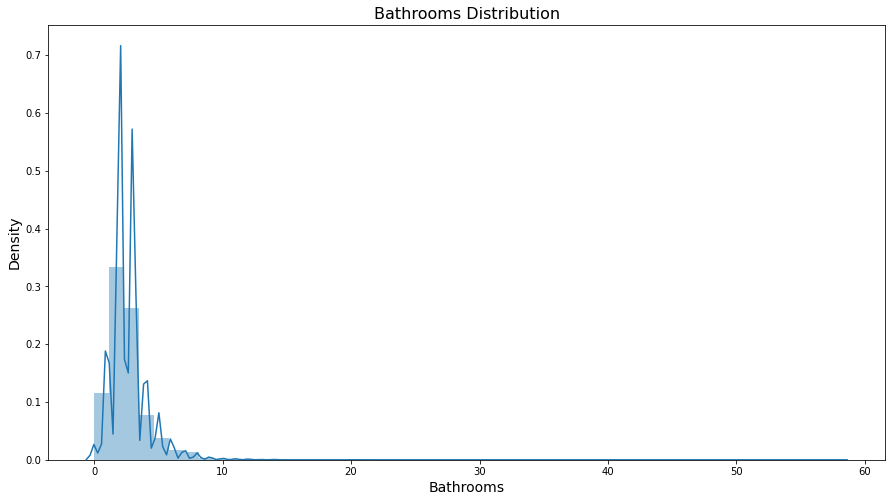

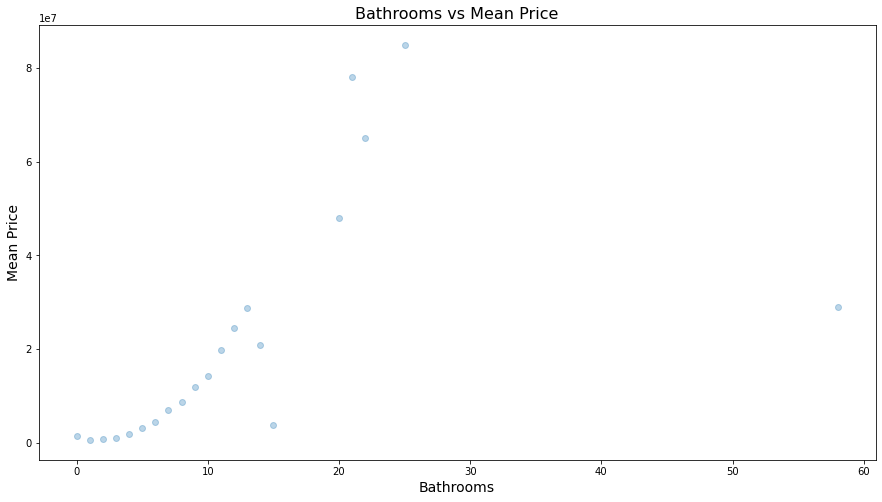

In [79]:
feature_analysis('bathrooms')

In [86]:
df = df[(df['bathrooms'] < 7) & (df['bathrooms'] != 0)] #Filtering out homes without bathrooms and more than 7 for the standard home 
df['bathrooms'].value_counts()

2.0    7553
3.0    5952
1.0    2336
4.0    1756
5.0     836
6.0     387
Name: bathrooms, dtype: int64

Bathrooms correlation with popularity is 0.4648594836917061
2.0    0.401328
3.0    0.316259
1.0    0.124123
4.0    0.093305
5.0    0.044421
6.0    0.020563
Name: bathrooms, dtype: float64
count    18820.000000
mean         2.594261
std          1.090559
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: bathrooms, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


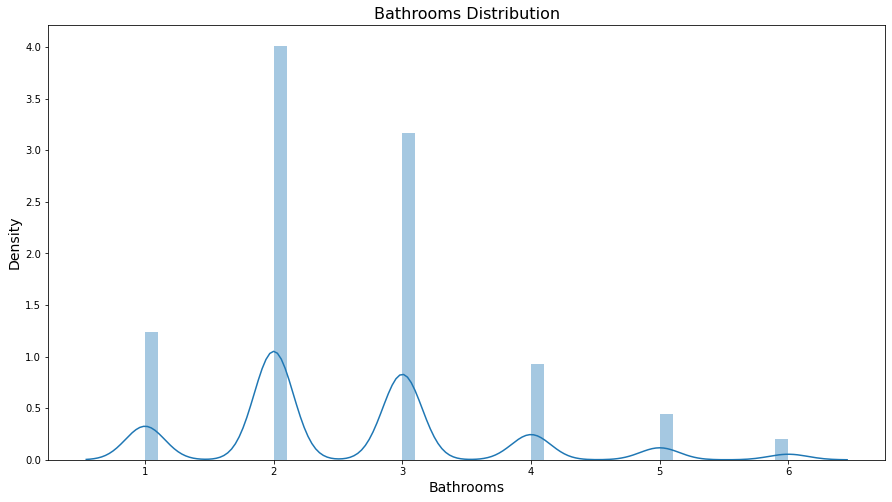

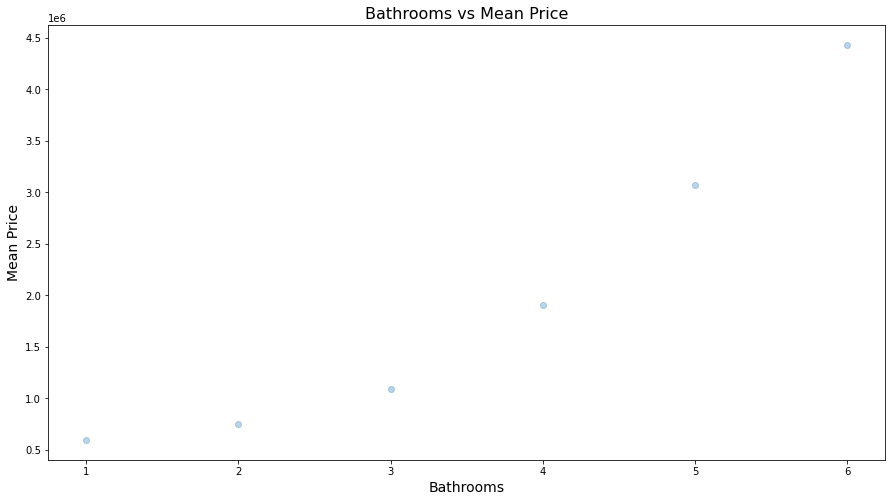

In [87]:
feature_analysis('bathrooms')

#### Bedrooms

In [80]:
df['bedrooms'].value_counts(normalize=True)

3.0     0.409238
4.0     0.305853
2.0     0.118900
5.0     0.106611
6.0     0.025705
1.0     0.013211
7.0     0.008859
0.0     0.005069
8.0     0.003636
9.0     0.001383
10.0    0.000461
11.0    0.000410
12.0    0.000205
13.0    0.000154
15.0    0.000154
52.0    0.000051
17.0    0.000051
32.0    0.000051
Name: bedrooms, dtype: float64

In [81]:
avg_price_bed = df.groupby('bedrooms')['price'].mean().sort_values(ascending=False)
avg_price_bed

bedrooms
17.0    8.500000e+07
52.0    2.900000e+07
11.0    1.640488e+07
12.0    1.456200e+07
7.0     8.564143e+06
8.0     7.876927e+06
32.0    7.500000e+06
10.0    6.025417e+06
15.0    4.733333e+06
9.0     4.514903e+06
6.0     3.998902e+06
13.0    3.395000e+06
5.0     2.292842e+06
0.0     2.226482e+06
4.0     1.313531e+06
3.0     8.789961e+05
1.0     7.415752e+05
2.0     7.043935e+05
Name: price, dtype: float64

Bedrooms correlation with popularity is 0.32995943046197956
3.0     0.409238
4.0     0.305853
2.0     0.118900
5.0     0.106611
6.0     0.025705
1.0     0.013211
7.0     0.008859
0.0     0.005069
8.0     0.003636
9.0     0.001383
10.0    0.000461
11.0    0.000410
12.0    0.000205
13.0    0.000154
15.0    0.000154
52.0    0.000051
17.0    0.000051
32.0    0.000051
Name: bedrooms, dtype: float64
count    19529.000000
mean         3.514005
std          1.215815
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         52.000000
Name: bedrooms, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


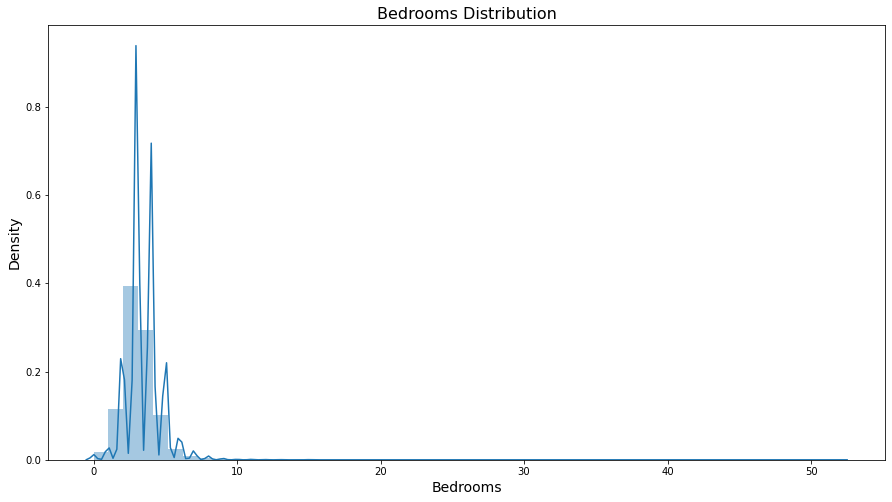

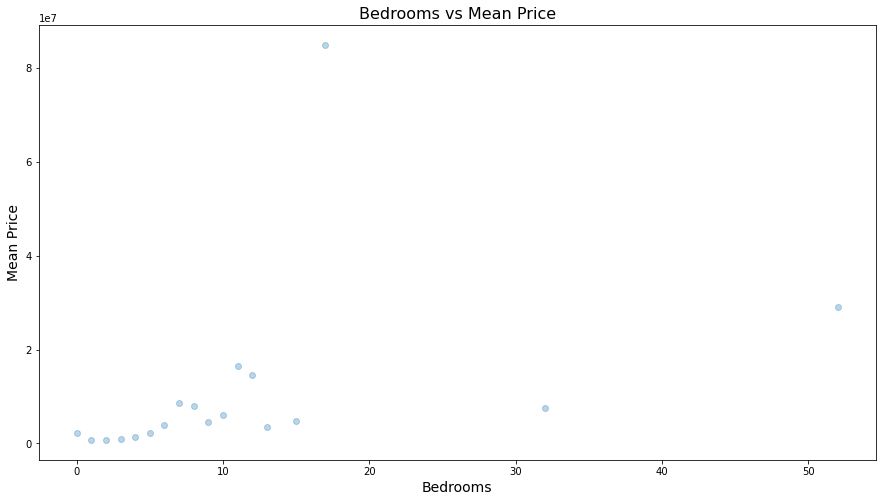

In [82]:
feature_analysis('bedrooms')

In [52]:
df = df[df['bedrooms'] < 7] #Filtering out houses with more than 6 bedrooms since most houses don't have more than that
df['bathrooms'].value_counts()

2.0    7549
3.0    5933
1.0    2335
4.0    1724
5.0     788
Name: bathrooms, dtype: int64

Bedrooms correlation with popularity is 0.21749208960703859
3.0    0.430793
4.0    0.318403
2.0    0.125430
5.0    0.094604
6.0    0.015986
1.0    0.013749
0.0    0.001037
Name: bedrooms, dtype: float64
count    18329.000000
mean         3.399531
std          0.933202
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: bedrooms, dtype: float64


C:\Users\erinv\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


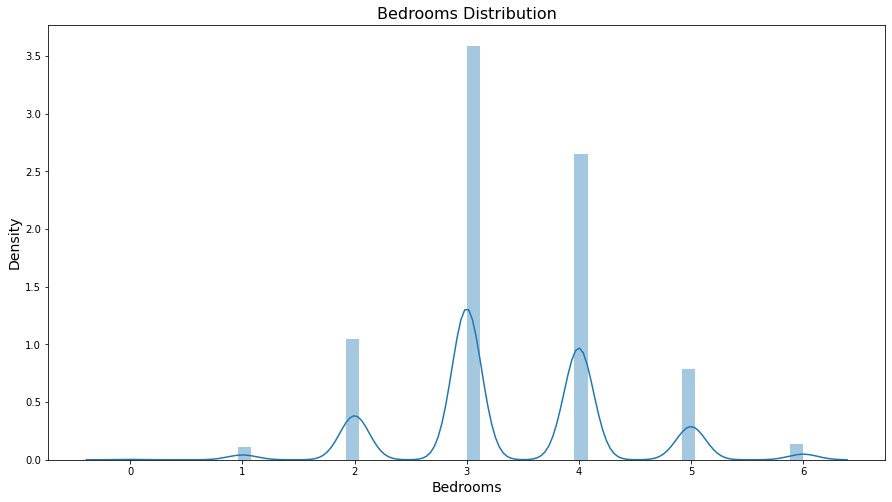

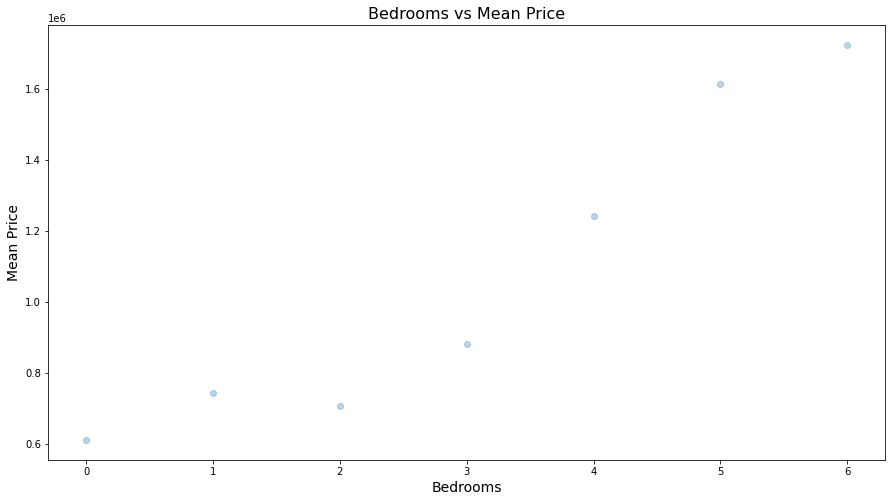

In [53]:
feature_analysis('bedrooms')

In [54]:
bedroom_outliers = df[(df['bedrooms'] == 0) & (df['price'] > 1000000)]
bedroom_outliers

,is_bankOwned,is_forAuction,event,price,pricePerSquareFoot,city,state,yearBuilt,streetAddress,zipcode,...,garageSpaces,hasGarage,levels,pool,spa,isNewConstruction,hasPetsAllowed,homeType,county,year
9061,0,0,Listed for sale,1549888.0,1458.0,Sunnyvale,CA,1926,421 S Sunnyvale Ave,94086.0,...,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Santa Clara County,2021
10470,0,0,Listed for sale,1400000.0,373.0,El Sobrante,CA,1949,4022 San Pablo Dam Rd,94803.0,...,0.0,1,0,0,0,0,0,SINGLE_FAMILY,Contra Costa County,2021
14739,0,0,Listed for sale,1395000.0,372.0,Seaside,CA,1972,751 Dias St,93955.0,...,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Monterey County,2021
16065,0,0,Listed for sale,1200000.0,316.0,Angels Camp,CA,1900,1177 S Main St,95222.0,...,0.0,0,0,0,0,0,0,SINGLE_FAMILY,Calaveras County,2021


#### Target: Popularity Analysis

In [55]:
df['price'].describe()

count    1.832900e+04
mean     1.053670e+06
std      1.235783e+06
min      0.000000e+00
25%      4.800000e+05
50%      7.490000e+05
75%      1.199000e+06
max      2.880000e+07
Name: price, dtype: float64

In [56]:
df['price'].value_counts(bins=8)

(-28800.001, 3600000.0]     17796
(3600000.0, 7200000.0]        425
(7200000.0, 10800000.0]        70
(10800000.0, 14400000.0]       17
(14400000.0, 18000000.0]       10
(18000000.0, 21600000.0]        5
(21600000.0, 25200000.0]        4
(25200000.0, 28800000.0]        2
Name: price, dtype: int64

In [57]:
df['price'].max()

28800000.0

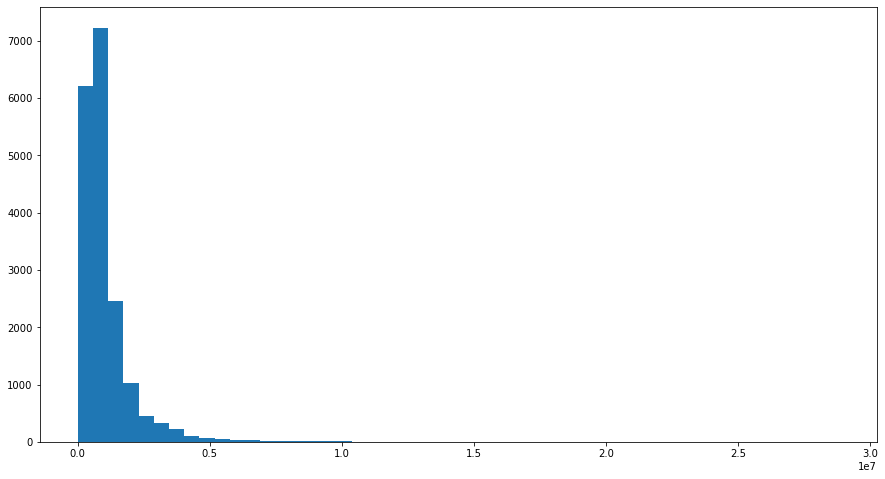

In [58]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df['price'], bins=50);

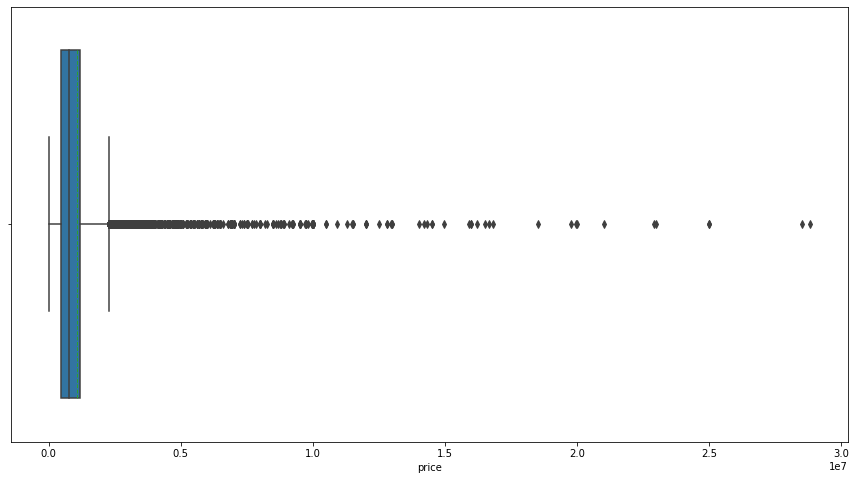

In [59]:
#Boxplot with outliers
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=df['price'], showmeans=True, meanline=True);

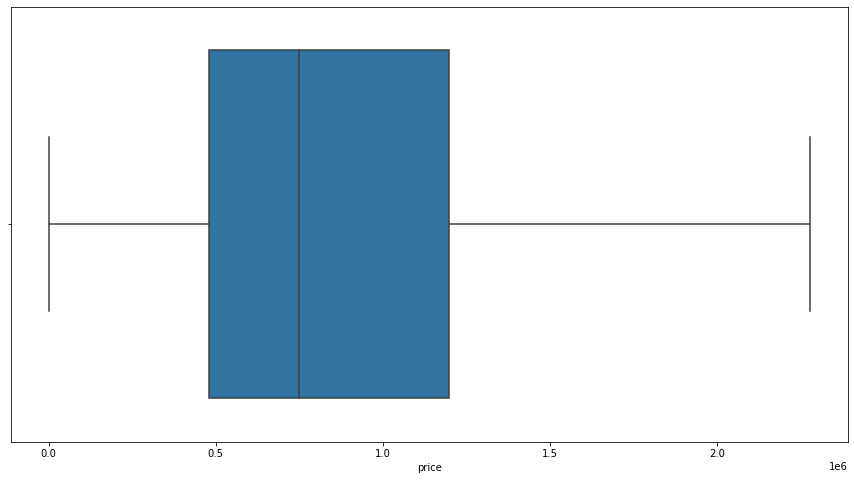

In [60]:
#Boxplot without outliers
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x=df['price'], showfliers=False);

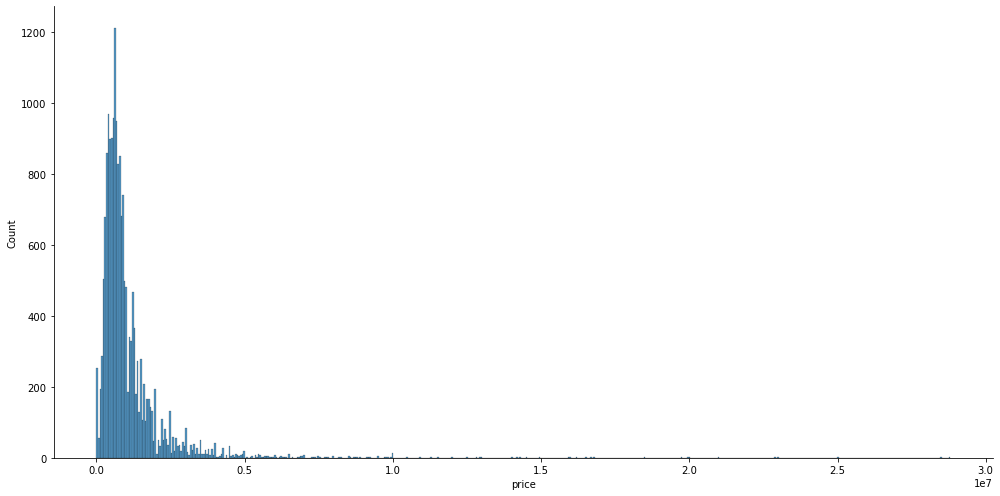

In [61]:
sns.displot(df['price'], height=7, aspect=2);

In [62]:
pop_corr = abs(df.corr()[['price']]).sort_values('price', ascending=False) #Correlation analysis against price
pop_corr

,price
price,1.000000
bathrooms,0.416429
bedrooms,0.217492
spa,0.122863
pool,0.107824
longitude,0.095395
garageSpaces,0.089970
parking,0.070400
zipcode,0.069504
hasGarage,0.054860


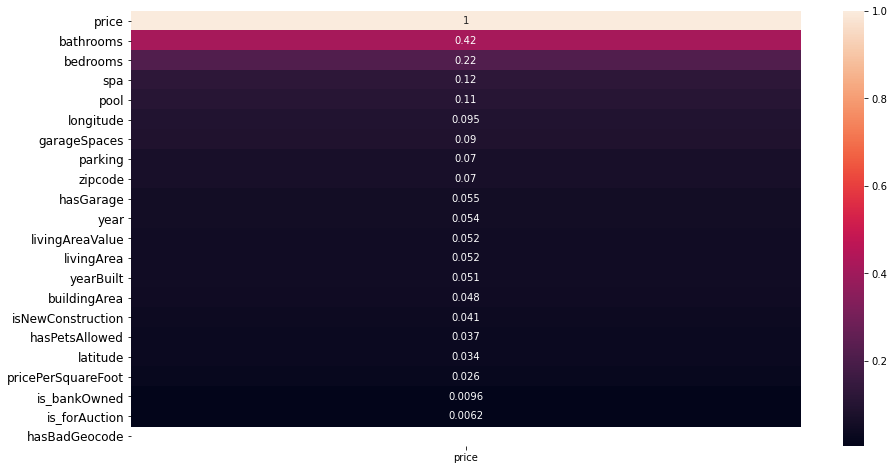

In [63]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(pop_corr, ax=ax, annot=True)
ax.set_yticklabels(labels=pop_corr.index, fontsize=12);

### Feature Exploration